<a href="https://colab.research.google.com/github/parksangau/colab/blob/main/0401_FinanceDataReader%E1%84%85%E1%85%B3%E1%86%AF_%E1%84%90%E1%85%A9%E1%86%BC%E1%84%92%E1%85%A1%E1%86%AB_%E1%84%8B%E1%85%A7%E1%84%85%E1%85%A5_%E1%84%8C%E1%85%A9%E1%86%BC%E1%84%86%E1%85%A9%E1%86%A8_%E1%84%89%E1%85%AE%E1%84%8B%E1%85%B5%E1%86%A8%E1%84%85%E1%85%B2%E1%86%AF_%E1%84%87%E1%85%B5%E1%84%80%E1%85%AD_input_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* **이번 노트북의 실습은 FinanceDataReader의 여러 종목 가격을 한번에** 자료를 참고하여 만들어 졌습니다.
* 참고 링크 :  [FinanceDataReader 여러 종목 가격을 한번에](https://nbviewer.jupyter.org/github/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%EC%9D%98%20%EA%B0%80%EA%B2%A9%EC%9D%84%20%ED%95%9C%EB%B2%88%EC%97%90.ipynb)


## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd
import numpy as np

* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [8]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# FinanceDataReader 를 fdr 별칭으로 불러오기
import FinanceDataReader as fdr

## 상장종목 목록 가져오기

* 다음의 형태가 되도록 만들어 주세요.

|    | 종목별           |
|---:|:-----------------|
|  1 | 삼성전자         |
|  2 | LG에너지솔루션   |
|  3 | SK하이닉스       |
|  4 | 삼성바이오로직스 |
|  5 | NAVER            |
|  6 | 삼성SDI          |
|  7 | 현대차           |
|  8 | LG화학           |
|  9 | 카카오           |
| 10 | 기아             |

In [3]:
url = "https://finance.naver.com/sise/entryJongmok.naver?&page=1"
print(url)


https://finance.naver.com/sise/entryJongmok.naver?&page=1


In [4]:
# 시가총액 상위 10개 종목에 대한 종목명
tables = pd.read_html(url)
df_table_top = tables[0][["종목별"]].dropna()
df_table_top

,종목별
1,삼성전자
2,LG에너지솔루션
3,SK하이닉스
4,삼성바이오로직스
5,LG화학
6,현대차
7,NAVER
8,삼성SDI
9,카카오
10,기아


## 전체 상장종목에서 종목코드와 종목명만 가져오기

* 아래의 형태가 되게 해주세요.

| Name             |   Symbol |
|:-----------------|---------:|
| 삼성전자         |   005930 |
| LG에너지솔루션   |   373220 |
| SK하이닉스       |   000660 |
| 삼성바이오로직스 |   207940 |
| NAVER            |   035420 |

In [10]:
df_krx = fdr.StockListing("KRX")
df_krx.shape

(8059, 10)

In [11]:
tables = pd.read_html(url)
print("테이블 개수: ", len(tables))
print("-"*30)
tables

테이블 개수:  2
------------------------------


[         종목별       현재가      전일비     등락률        거래량  거래대금(백만)    시가총액(억)
 0        NaN       NaN      NaN     NaN        NaN       NaN        NaN
 1       삼성전자   59600.0    600.0  +1.02%  3524067.0  209055.0  3557990.0
 2   LG에너지솔루션  455500.0   4500.0  +1.00%   147672.0   66949.0  1065870.0
 3     SK하이닉스   93800.0    600.0  +0.64%  1358090.0  126635.0   682866.0
 4   삼성바이오로직스  844000.0  16000.0  +1.93%    21042.0   17604.0   600709.0
 5       LG화학  614000.0      0.0   0.00%    79736.0   48722.0   433437.0
 6        현대차  191000.0   3000.0  +1.60%   296321.0   56382.0   408106.0
 7      삼성SDI  585000.0   6000.0  -1.02%   143195.0   83215.0   402272.0
 8      NAVER  245000.0   3500.0  +1.45%   241687.0   59383.0   401920.0
 9        카카오   76000.0   1100.0  +1.47%   851101.0   64575.0   338314.0
 10        기아   78100.0   1500.0  +1.96%   492420.0   38278.0   316589.0
 11       NaN       NaN      NaN     NaN        NaN       NaN        NaN
 12       NaN       NaN      NaN     NaN        NaN

## merge 를 통한 시가총액 상위 10개 종목 만들기

### merge
<img src="https://pandas.pydata.org/docs/_images/08_merge_left.svg">

<img src="https://i.imgur.com/nD1Hwdl.png" width=500>



* 아래의 형태가 되게 만들며, Name을 인덱스로 지정합니다.

| Name             |   Symbol |
|:-----------------|---------:|
| 삼성전자         |   005930 |
| LG에너지솔루션   |   373220 |
| SK하이닉스       |   000660 |
| 삼성바이오로직스 |   207940 |
| NAVER            |   035420 |
| 삼성SDI          |   006400 |
| 현대차           |   005380 |
| LG화학           |   051910 |
| 카카오           |   035720 |
| 기아             |   000270 |

In [13]:
df_top_merge = df_table_top.merge(df_krx,left_on="종목별", right_on="Name", how="left")
df_top_merge

,종목별,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,삼성전자,005930,KOSPI,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"한종희, 경계현",http://www.sec.co.kr,경기도
1,LG에너지솔루션,373220,KOSPI,LG에너지솔루션,일차전지 및 축전지 제조업,"2차전지 (소형,ESS,자동차전지)",2022-01-27,12월,권영수,NaN,서울특별시
2,SK하이닉스,000660,KOSPI,SK하이닉스,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매",1996-12-26,12월,"박정호, 곽노정 (각자대표)",http://www.skhynix.com,경기도
3,삼성바이오로직스,207940,KOSPI,삼성바이오로직스,기초 의약물질 및 생물학적 제제 제조업,바이오의약품,2016-11-10,12월,임존종보 (Rim John Chongbo),http://www.samsungbiologics.com,인천광역시
4,LG화학,051910,KOSPI,LG화학,기초 화학물질 제조업,"유화/기능/합성수지,재생섬유소,산업재,리튬이온전지,평광판,PVC 제조,도매",2001-04-25,12월,신학철,http://www.lgchem.com,서울특별시
5,현대차,005380,KOSPI,현대차,자동차용 엔진 및 자동차 제조업,"자동차(승용차,버스,트럭,특장차),자동차부품,자동차전착도료 제조,차량정비사업",1974-06-28,12월,"정의선, 장재훈, 이동석(각자 대표이사)",http://www.hyundai.com,서울특별시
6,NAVER,035420,KOSPI,NAVER,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",포털 서비스 및 온라인 광고,2008-11-28,12월,최수연,http://www.navercorp.com,경기도
7,삼성SDI,006400,KOSPI,삼성SDI,일차전지 및 축전지 제조업,"2차전지, 전자재료 제조 판매",1979-02-27,12월,최윤호,http://www.samsungsdi.co.kr,경기도
8,카카오,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,"남궁훈, 홍은택 각자 대표이사",http://www.kakaocorp.com,제주특별자치도
9,기아,000270,KOSPI,기아,자동차용 엔진 및 자동차 제조업,"승용차,중대형버스,트럭,민수특수차량,군수차량 제조,판매,정비",1973-07-21,12월,"송호성,최준영(각자 대표이사)",http://www.kia.co.kr,서울특별시


In [14]:
df_top = df_top_merge[["Name", "Symbol"]]
df_top

,Name,Symbol
0,삼성전자,005930
1,LG에너지솔루션,373220
2,SK하이닉스,000660
3,삼성바이오로직스,207940
4,LG화학,051910
5,현대차,005380
6,NAVER,035420
7,삼성SDI,006400
8,카카오,035720
9,기아,000270


## 여러 종목의 종가 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [15]:
# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
# item_list = []
for i, val in df_top.iterrows():
    print("종목명:", val["Name"], " 종목코드:", val["Symbol"])


종목명: 삼성전자  종목코드: 005930
종목명: LG에너지솔루션  종목코드: 373220
종목명: SK하이닉스  종목코드: 000660
종목명: 삼성바이오로직스  종목코드: 207940
종목명: LG화학  종목코드: 051910
종목명: 현대차  종목코드: 005380
종목명: NAVER  종목코드: 035420
종목명: 삼성SDI  종목코드: 006400
종목명: 카카오  종목코드: 035720
종목명: 기아  종목코드: 000270


In [16]:
#시리즈를 리스트로 만들어서 순회하는 방법
for sym in df_top["Symbol"].tolist():
    print(sym)

005930
373220
000660
207940
051910
005380
035420
006400
035720
000270


In [17]:
# 시가총액 10개 종목에 대해 종가(마지막가격)를 수집해서 리스트 만들기
item_list = []
for sym in df_top["Symbol"].tolist():
    close = fdr.DataReader(sym, "2021")["Close"]
    item_list.append(close)

item_list

[Date
 2021-01-04    83000
 2021-01-05    83900
 2021-01-06    82200
 2021-01-07    82900
 2021-01-08    88800
               ...  
 2022-08-19    60900
 2022-08-22    60000
 2022-08-23    59100
 2022-08-24    59000
 2022-08-25    59500
 Name: Close, Length: 408, dtype: int64, Date
 2022-01-27    505000
 2022-01-28    450000
 2022-02-03    477000
 2022-02-04    504000
 2022-02-07    548000
                ...  
 2022-08-19    447000
 2022-08-22    442500
 2022-08-23    445000
 2022-08-24    451000
 2022-08-25    456000
 Name: Close, Length: 142, dtype: int64, Date
 2021-01-04    126000
 2021-01-05    130500
 2021-01-06    131000
 2021-01-07    134500
 2021-01-08    138000
                ...  
 2022-08-19     96400
 2022-08-22     95200
 2022-08-23     93600
 2022-08-24     93200
 2022-08-25     93800
 Name: Close, Length: 408, dtype: int64, Date
 2021-01-04    819298
 2021-01-05    822263
 2021-01-06    807438
 2021-01-07    809415
 2021-01-08    827204
                ...  
 2022-08-

In [18]:
# 위 반복문과 동일한 결과지만 코드를 훨씬 간결하게 작성 할 수 있음
# 리스트컴프리헨션으로 10개 종목 수집하기
item_list = [fdr.DataReader(sym, "2021")["Close"] for sym in df_top["Symbol"].tolist()]
len(item_list)


10

### 하나의 데이터프레임으로 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [19]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.

df_item = pd.concat(item_list, axis=1)
df_item

,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,
2021-01-04,83000,NaN,126000,819298,889000,207500,293000,671000,79483,64000
2021-01-05,83900,NaN,130500,822263,893000,209500,292500,686000,78881,63700
2021-01-06,82200,NaN,131000,807438,890000,203000,290000,680000,79383,62200
2021-01-07,82900,NaN,134500,809415,962000,206000,289500,698000,80788,63000
2021-01-08,88800,NaN,138000,827204,999000,246000,312000,739000,87111,68300
...,...,...,...,...,...,...,...,...,...,...
2022-08-19,60900,447000.0,96400,868000,640000,190000,248000,618000,76700,77200
2022-08-22,60000,442500.0,95200,851000,639000,189000,245500,600000,75000,77400
2022-08-23,59100,445000.0,93600,829000,620000,189000,241000,587000,74800,77400


In [20]:
df_top["Name"].tolist()

['삼성전자',
 'LG에너지솔루션',
 'SK하이닉스',
 '삼성바이오로직스',
 'LG화학',
 '현대차',
 'NAVER',
 '삼성SDI',
 '카카오',
 '기아']

In [21]:
df_item.columns = df_top["Name"].tolist()
df_item.head()

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,LG화학,현대차,NAVER,삼성SDI,카카오,기아
Date,,,,,,,,,,
2021-01-04,83000,NaN,126000,819298,889000,207500,293000,671000,79483,64000
2021-01-05,83900,NaN,130500,822263,893000,209500,292500,686000,78881,63700
2021-01-06,82200,NaN,131000,807438,890000,203000,290000,680000,79383,62200
2021-01-07,82900,NaN,134500,809415,962000,206000,289500,698000,80788,63000
2021-01-08,88800,NaN,138000,827204,999000,246000,312000,739000,87111,68300


### 시각화를 위한 폰트 설정

In [22]:
# 한글폰트 사용을 위해 설치
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.1 MB/s 


In [23]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

* 그래프의 다양한 style 설정 : [Customizing Matplotlib with style sheets and rcParams — Matplotlib documentation](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html)

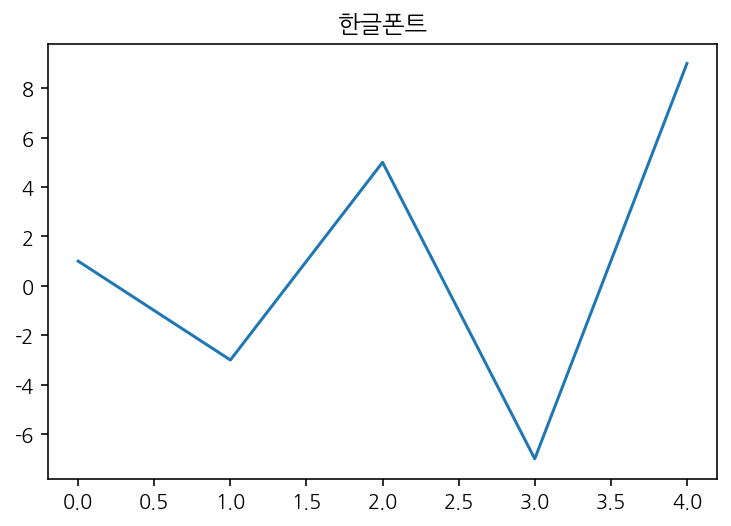

In [ ]:
# 한글폰트 확인
pd.Series([1, -3, 5, -7, 9]).plot(title="한글폰트")

## 여러 종목 한번에 시각화 하기

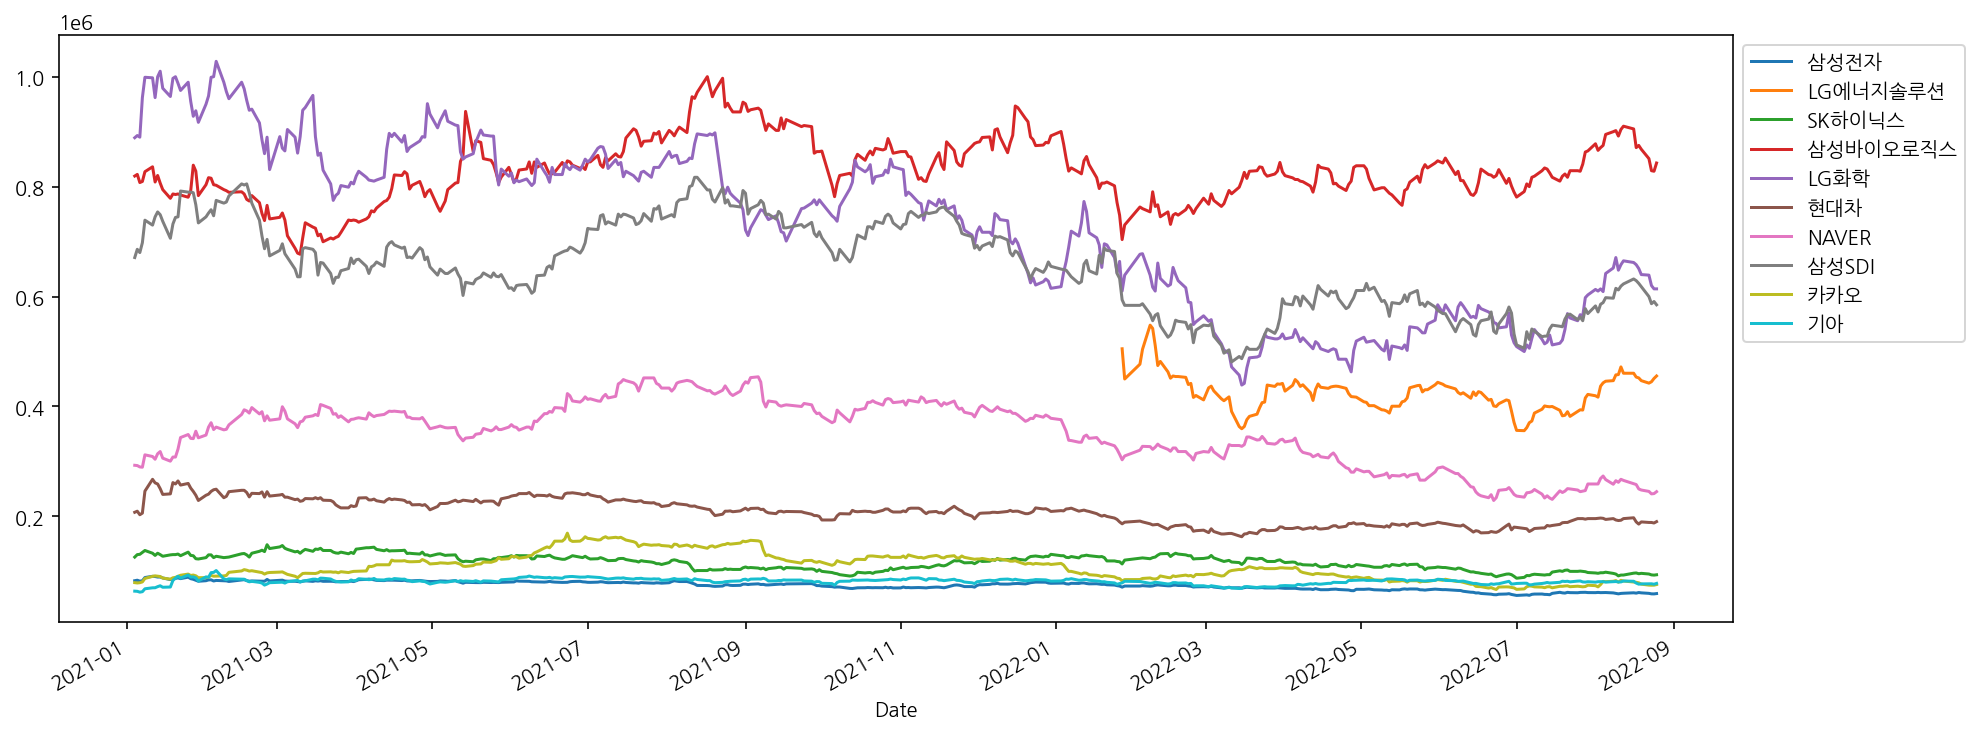

In [24]:
import matplotlib.pyplot as plt

# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df_item.plot(figsize=(15,6))
plt.legend(bbox_to_anchor=(1,1))

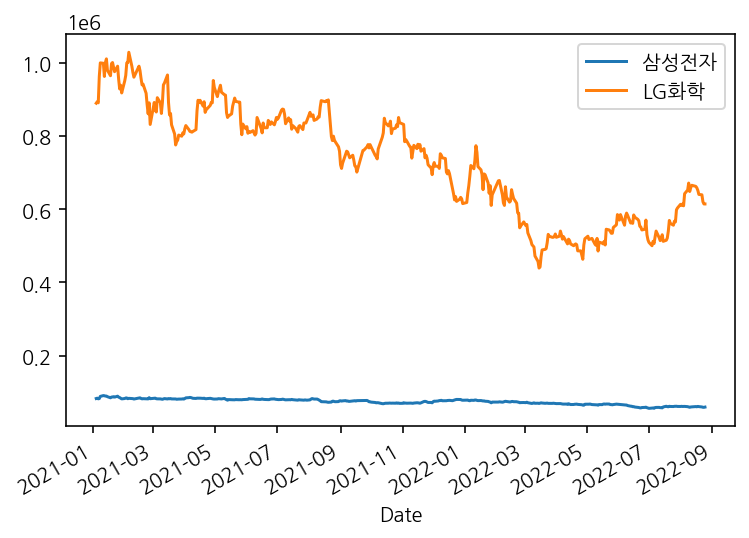

In [25]:
# 2개의 종목 비교하기 : "삼성전자", "LG화학" 을 plot으로 시각화 합니다.
df_item[["삼성전자", "LG화학"]].plot()

## 2축 그래프 사용하기

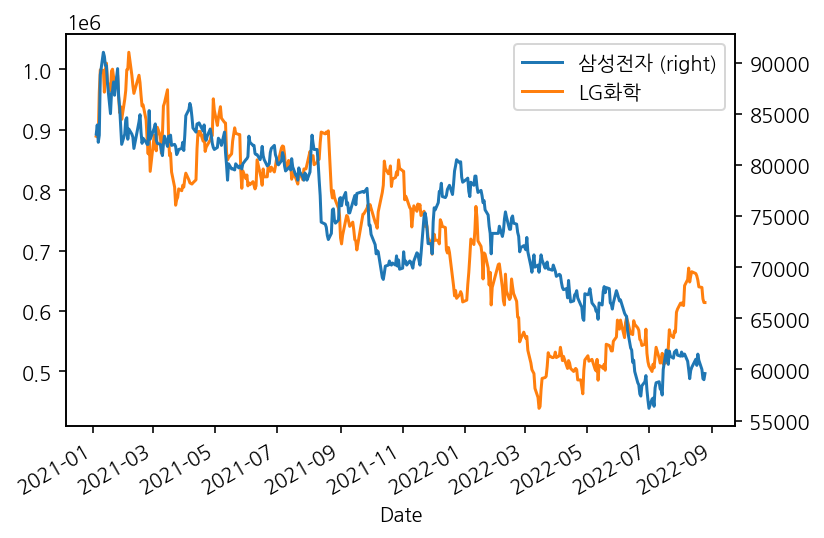

In [26]:
# secondary_y를 사용해 2축 그래프 그리기
df_item[["삼성전자", "LG화학"]].plot(secondary_y="삼성전자")

## 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값을 구합니다.
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있도록 합니다.
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용하기도 합니다.
    * 표준화(standardization) : 
        * 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        * (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization) : 
        * 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        * (측정값 - 최소값) / (최대값 - 최소값)

In [33]:
# 일별 수익률 구하기
# df2 변수에 'LG화학', '삼성전자' 만 따로 가져옵니다.
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# df_plot 에 수익률을 담아줍니다.

df2 = df_item[["LG화학", "삼성전자"]]
df_plot = (df2 / df2.iloc[0]) - 1
df_plot

,LG화학,삼성전자
Date,,
2021-01-04,0.000000,0.000000
2021-01-05,0.004499,0.010843
2021-01-06,0.001125,-0.009639
2021-01-07,0.082115,-0.001205
2021-01-08,0.123735,0.069880
...,...,...
2022-08-19,-0.280090,-0.266265
2022-08-22,-0.281215,-0.277108
2022-08-23,-0.302587,-0.287952


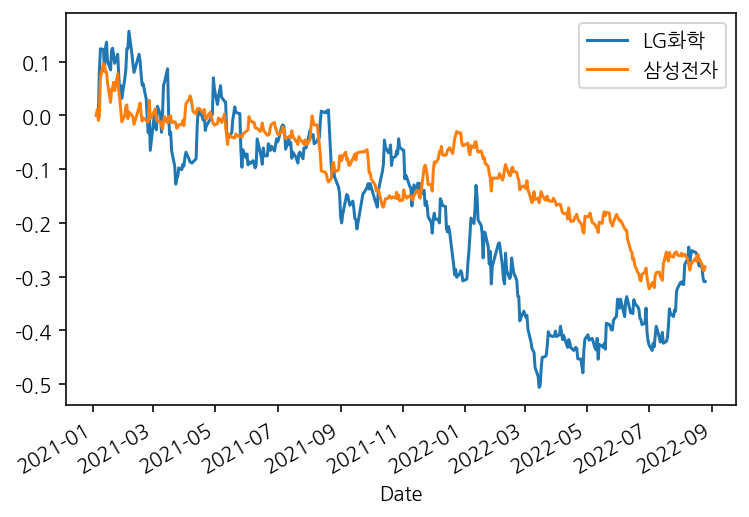

In [34]:
# 수익률 시각화 하기
df_plot.plot()

## pyplot의 subplots 로 서브플롯 그리기

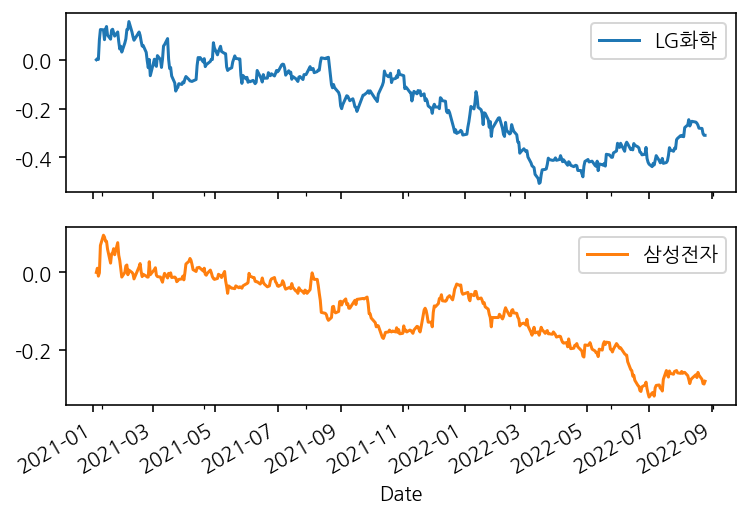

In [39]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해 봅니다.

df_plot.plot(subplots=True)
plt.show()

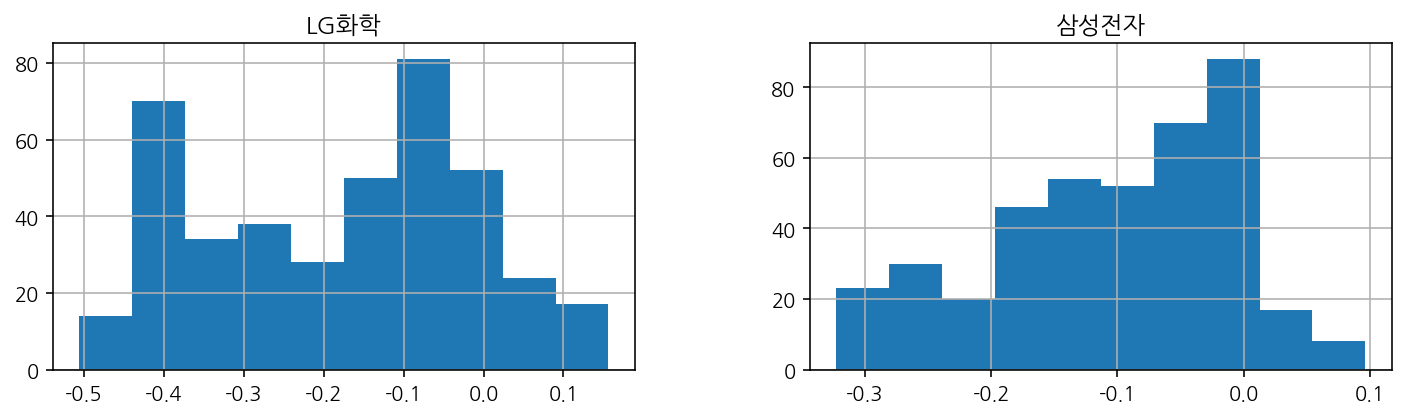

In [38]:
# df_plot 데이터프레임을 통해 수익률의 분포를 histogram으로 시각화 합니다.

df_plot.hist(figsize=(12,3))
plt.show()

## 전체 데이터프레임 값에 대한 수익률 계산하기

In [41]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
df_norm = df_item / df_item.iloc[0] - 1
df_norm

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,LG화학,현대차,NAVER,삼성SDI,카카오,기아
Date,,,,,,,,,,
2021-01-04,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-05,0.010843,NaN,0.035714,0.003619,0.004499,0.009639,-0.001706,0.022355,-0.007574,-0.004687
2021-01-06,-0.009639,NaN,0.039683,-0.014476,0.001125,-0.021687,-0.010239,0.013413,-0.001258,-0.028125
2021-01-07,-0.001205,NaN,0.067460,-0.012063,0.082115,-0.007229,-0.011945,0.040238,0.016419,-0.015625
2021-01-08,0.069880,NaN,0.095238,0.009650,0.123735,0.185542,0.064846,0.101341,0.095970,0.067187
...,...,...,...,...,...,...,...,...,...,...
2022-08-19,-0.266265,NaN,-0.234921,0.059444,-0.280090,-0.084337,-0.153584,-0.078987,-0.035014,0.206250
2022-08-22,-0.277108,NaN,-0.244444,0.038694,-0.281215,-0.089157,-0.162116,-0.105812,-0.056402,0.209375
2022-08-23,-0.287952,NaN,-0.257143,0.011842,-0.302587,-0.089157,-0.177474,-0.125186,-0.058918,0.209375


In [42]:
df_norm["LG에너지솔루션"] = df_item["LG에너지솔루션"] / df_item["LG에너지솔루션"].dropna().iloc[0] - 1
df_norm

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,LG화학,현대차,NAVER,삼성SDI,카카오,기아
Date,,,,,,,,,,
2021-01-04,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-05,0.010843,NaN,0.035714,0.003619,0.004499,0.009639,-0.001706,0.022355,-0.007574,-0.004687
2021-01-06,-0.009639,NaN,0.039683,-0.014476,0.001125,-0.021687,-0.010239,0.013413,-0.001258,-0.028125
2021-01-07,-0.001205,NaN,0.067460,-0.012063,0.082115,-0.007229,-0.011945,0.040238,0.016419,-0.015625
2021-01-08,0.069880,NaN,0.095238,0.009650,0.123735,0.185542,0.064846,0.101341,0.095970,0.067187
...,...,...,...,...,...,...,...,...,...,...
2022-08-19,-0.266265,-0.114851,-0.234921,0.059444,-0.280090,-0.084337,-0.153584,-0.078987,-0.035014,0.206250
2022-08-22,-0.277108,-0.123762,-0.244444,0.038694,-0.281215,-0.089157,-0.162116,-0.105812,-0.056402,0.209375
2022-08-23,-0.287952,-0.118812,-0.257143,0.011842,-0.302587,-0.089157,-0.177474,-0.125186,-0.058918,0.209375


### 전체 종목의 수익률 시각화

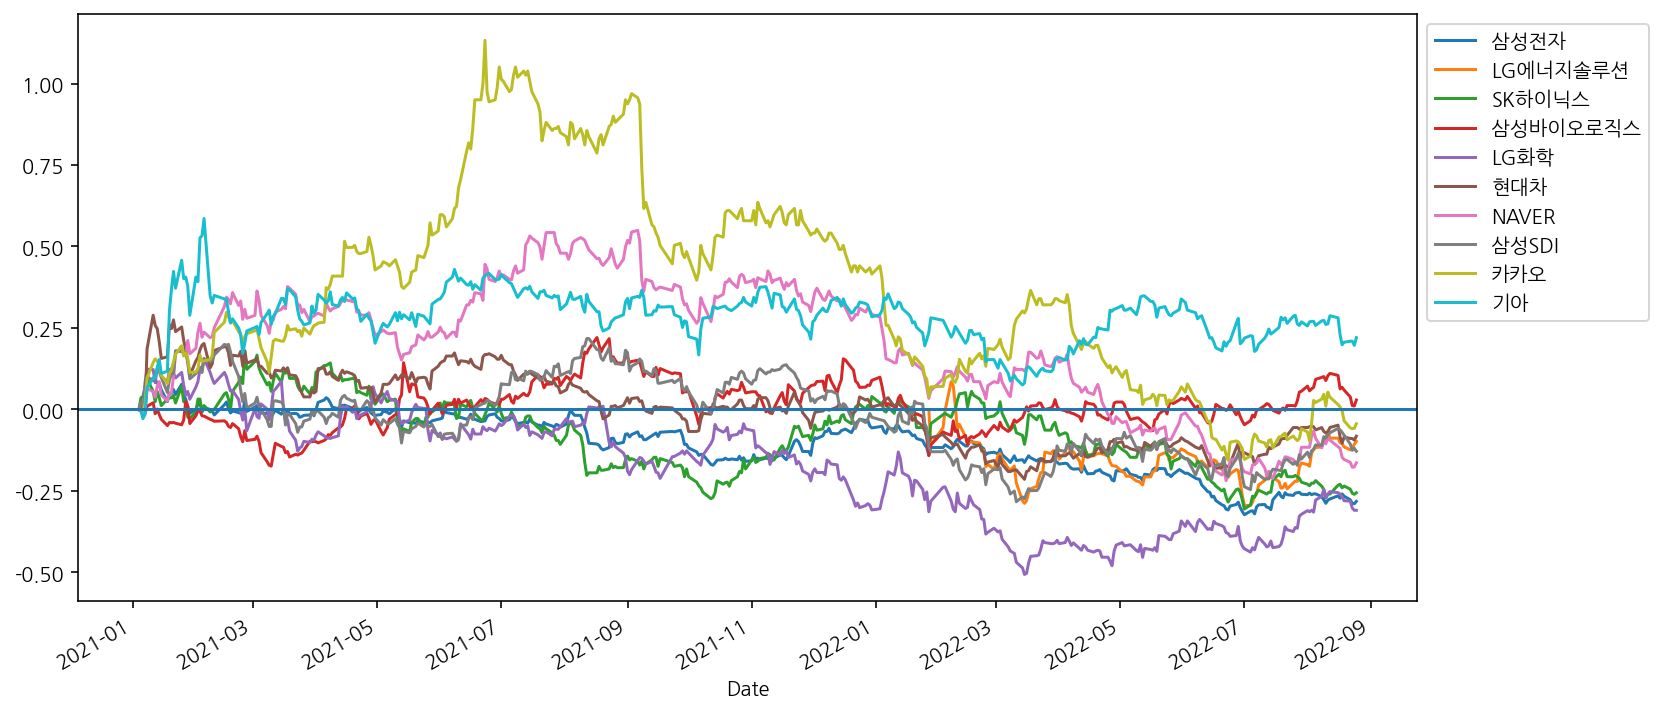

In [45]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.
df_norm.plot(figsize=(12, 6))

# 0 값을 기준치로 두어서 자료를 더 쉽게 볼수있다
plt.axhline(0) 
plt.legend(bbox_to_anchor=(1, 1))

In [48]:
# 계산된 수익률에 대한 기술통계값 구하기
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
삼성전자,408.0,-0.103845,0.096555,-0.322892,-0.165361,-0.087349,-0.024096,0.096386
LG에너지솔루션,142.0,-0.160138,0.065042,-0.295050,-0.205941,-0.157921,-0.126733,0.085149
SK하이닉스,408.0,-0.071417,0.109471,-0.305556,-0.158730,-0.055556,0.012897,0.178571
삼성바이오로직스,408.0,0.012019,0.070176,-0.173704,-0.030338,0.008444,0.054282,0.220748
LG화학,408.0,-0.179915,0.169463,-0.506187,-0.342238,-0.147919,-0.049213,0.156355
현대차,408.0,0.003567,0.112061,-0.214458,-0.101205,0.007229,0.096988,0.289157
NAVER,408.0,0.197291,0.203718,-0.218430,0.054181,0.237201,0.353242,0.549488
삼성SDI,408.0,-0.022391,0.120091,-0.283159,-0.121088,-0.024590,0.088301,0.217586
카카오,408.0,0.357588,0.314409,-0.155794,0.116641,0.305311,0.561655,1.132531
기아,408.0,0.282024,0.081413,-0.028125,0.240625,0.292188,0.335938,0.585938


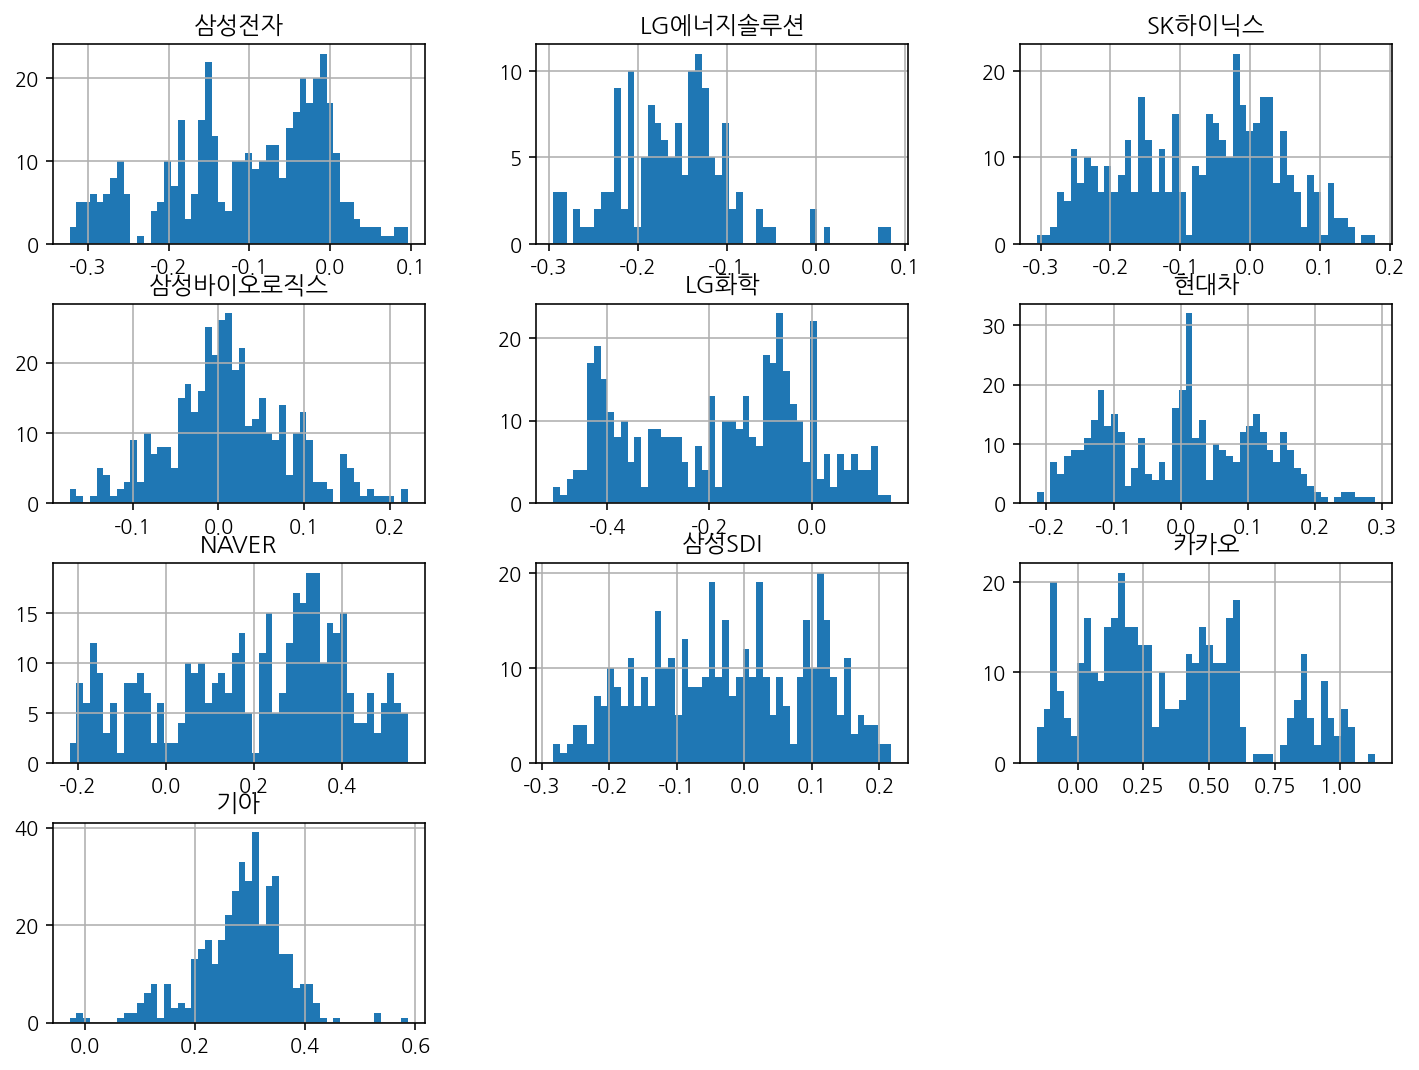

In [51]:
# 수익률에 대한 히스토그램 그리기
df_norm.hist(figsize=(12,9), bins=50)
plt.show()

## 왜도와 첨도

* 히스토그램의 분포를 추정해서 밀도추정곡선을 그리기도 합니다.
* 여기에서는 왜도와 첨도를 구해 각 종목의 수익률 분포를 수치화된 데이터로 구해봅니다.

### 왜도
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="600">



<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="600">


* 비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 
    * 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 
    * 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 
    * 평균과 중앙값이 같으면 왜도는 0이 된다.
    
* 출처 : [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)

In [52]:
# skew 로 수익률의 왜도를 구합니다.

df_norm.skew()

삼성전자       -0.449347
LG에너지솔루션    0.677716
SK하이닉스     -0.131540
삼성바이오로직스    0.165308
LG화학       -0.128442
현대차         0.109336
NAVER      -0.375247
삼성SDI      -0.067291
카카오         0.472202
기아         -0.624658
dtype: float64

### 첨도

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Standard_symmetric_pdfs.svg/1920px-Standard_symmetric_pdfs.svg.png" width="200">

* 첨도(尖度, 영어: kurtosis 커토시스)는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다. 
    * 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 
    * 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 
    * 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다.

* 출처 : [첨도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84)



* [scipy.stats.kurtosis — SciPy Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)
* Fisher의 정의를 사용하면 결과에서 3.0을 빼서 정규 분포에 대해 0.0이 됩니다.
* True 이면 피셔의 정의가 사용됩니다(정상 ==> 0.0). False이면 Pearson의 정의가 사용됩니다(정상 ==> 3.0)

In [53]:
# kurt 로 첨도를 구합니다.
df_norm.kurt()

# 해석 -> "LG에너지솔루션" 과 "기아" 는 조금 더 뾰족하다.

삼성전자       -0.683495
LG에너지솔루션    1.902835
SK하이닉스     -0.926112
삼성바이오로직스    0.191530
LG화학       -1.174386
현대차        -0.906882
NAVER      -0.903173
삼성SDI      -1.001953
카카오        -0.659897
기아          1.673872
dtype: float64